In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib notebook

## Problem 1

Use the `FuncAnimation` class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds. (Hint: Each frame of the animation will be a plot of $sin(x + 0.1t_i)$, where $t_i$ is the $i$th value of time for some array of time values).

<IPython.core.display.Javascript object>


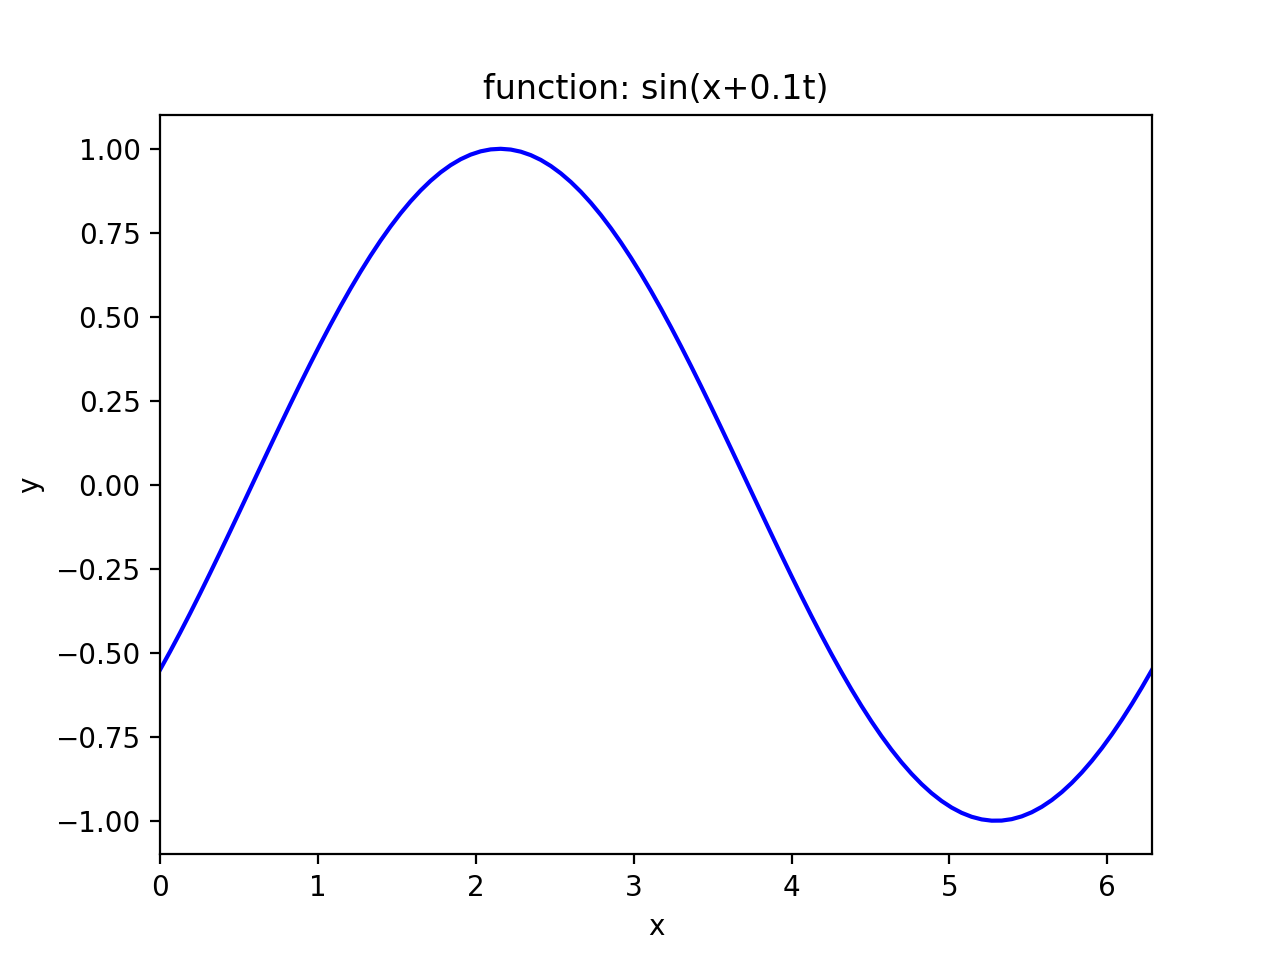

In [8]:
#define the domain
x = np.linspace(0,2*np.pi,100)

#create figure
fig = plt.figure()
ax = fig.add_subplot(111)

#Create Limits
ax.set_xlim((0,2*np.pi))
ax.set_ylim((-1.1,1.1))
plt.title("function: sin(x+0.1t)")
plt.xlabel("x")
plt.ylabel("y")

#update the line
line, = plt.plot([],[], color='b')
def update(t):
    line.set_data(x, np.sin(x+0.1*t))
    return line
#plot the function                                
ani = FuncAnimation(fig, update, frames=range(101), interval=25)
plt.show()

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

<IPython.core.display.Javascript object>


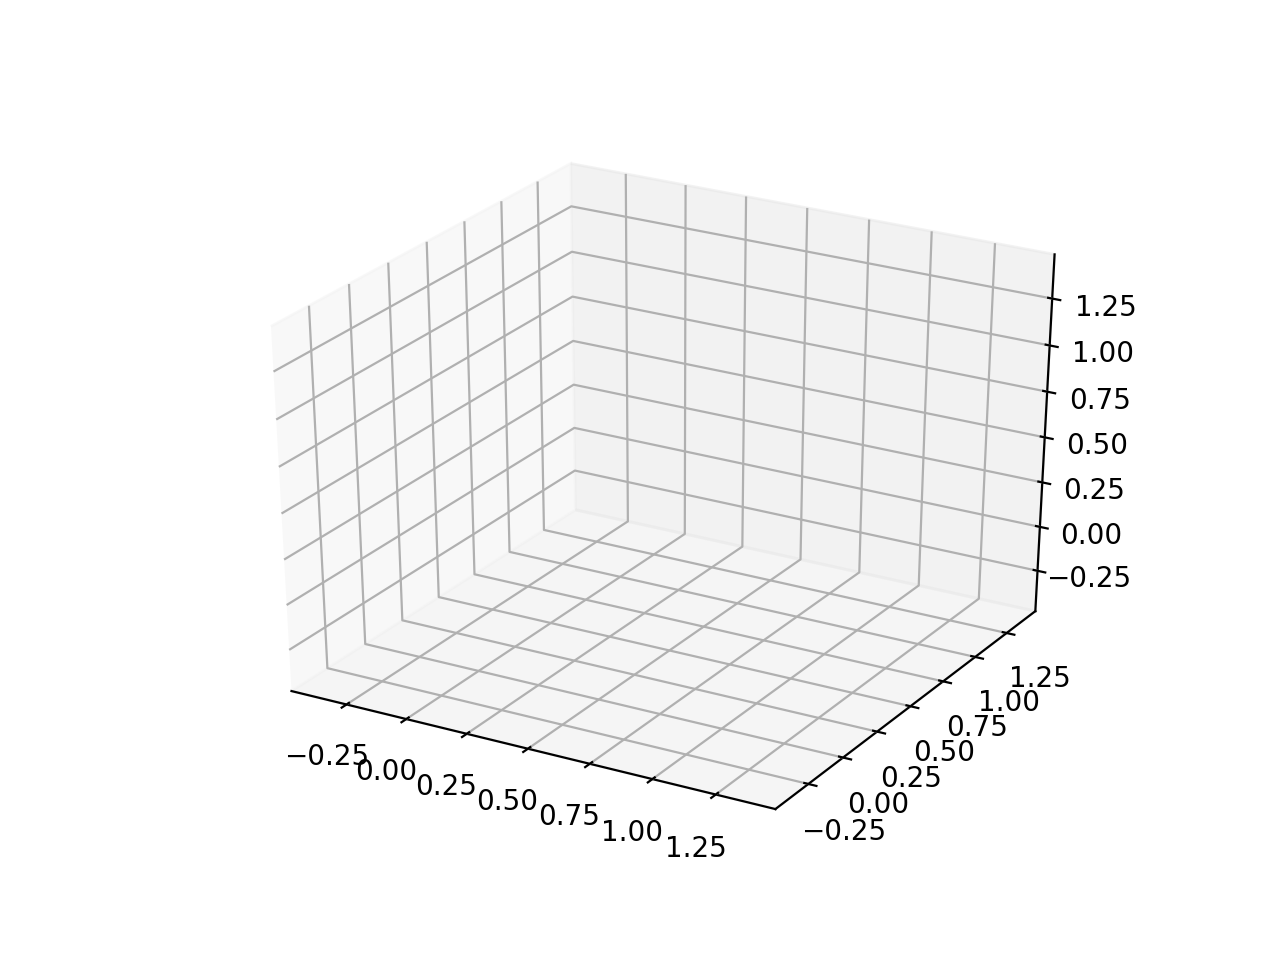

FileNotFoundError: [Errno 2] No such file or directory: 'orbits.npz'

In [9]:
# Create figure object.
fig = plt.figure()

# Create 3D axis object using add_subplot().
ax = fig.add_subplot(111, projection='3d')

#load the data
data = np.load("orbits.npz")
mercury = data["mercury"]
venus = data["venus"]
earth = data["earth"]
mars = data["mars"]

ax.set_zlim(-1,1)
plt.title("Orbits")
#plot the function                                
ax.plot(mercury[:,0],mercury[:,1],mercury[:,2], label = "Mercury")
ax.plot(venus[:,0],venus[:,1],venus[:,2], label = "Venus")
ax.plot(earth[:,0],earth[:,1],earth[:,2], label = "Earth")
ax.plot(mars[:,0],mars[:,1],mars[:,2],label = "Mars")
ax.plot([0],[0],[0],marker = 'o',label = "Sun", color = "y")
plt.legend()
plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot as "planet_ani.mp4".

To display the mp4 video in the Jupyter Notebook, run the following code in a markdown cell:

`<video src="planet_ani.mp4" controls>`

In [ ]:
# Create figure object.
fig = plt.figure()

# Create 3D axis object using add_subplot().
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.title("Mingyan Zhao")


#load the data
data = np.load("orbits.npz")
mercury = data["mercury"]
venus = data["venus"]
earth = data["earth"]
mars = data["mars"]

#update the line
line1, = plt.plot([],[],[], color='b', marker = ".")
traj1, = plt.plot([],[],[], color='b', label = "Mercury")

line2, = plt.plot([],[],[], color='r', marker = ".")
traj2, = plt.plot([],[],[], color='r', label = "Venus")

line3, = plt.plot([],[],[], color='g', marker = ".")
traj3, = plt.plot([],[],[], color='g', label = "Earth")

line4, = plt.plot([],[],[], marker = ".")
traj4, = plt.plot([],[],[], label = "Mars")

def update(t):
    line1.set_data(mercury[t,0],mercury[t,1])
    line1.set_3d_properties(mercury[t,2])
    traj1.set_data(mercury[:t+1,0],mercury[:t+1,1])
    traj1.set_3d_properties(mercury[:t+1,2])
    
    line2.set_data(venus[t,0],venus[t,1])
    line2.set_3d_properties(venus[t,2])
    traj2.set_data(venus[:t+1,0],venus[:t+1,1])
    traj2.set_3d_properties(venus[:t+1,2])
    
    line3.set_data(earth[t,0],earth[t,1])
    line3.set_3d_properties(earth[t,2])
    traj3.set_data(earth[:t+1,0],earth[:t+1,1])
    traj3.set_3d_properties(earth[:t+1,2])
    
    line4.set_data(mars[t,0],mars[t,1])
    line4.set_3d_properties(mars[t,2])
    traj4.set_data(mars[:t+1,0],mars[:t+1,1])
    traj4.set_3d_properties(mars[:t+1,2])
    
    return line1, line2, line3, line4, traj1, traj2, traj3, traj4

plt.legend()
animation.writer = animation.writers["ffmpeg"]
# Turn off interactive mode to hide rendering animations
plt.ioff()

# Code to create figure, axes, update function
#plot the function                                
ani = FuncAnimation(fig, update, frames=range(1400), interval = 10)
ani.save('my_animation.mp4')



<video src="my_animation.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}\exp(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu}))$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

(Hint: Rewrite $f$ as a function of $x$ and $y$, expanding the matrix-vector products inside the exponential. Then evaluate your function on the meshgrid corresponding to $(x,y) \in [-5,5] \times [-5,5]$).

In [ ]:
# Create figure object.
fig = plt.figure()

# Create 3D axis object using add_subplot().
ax = fig.add_subplot(111, projection='3d')

# set the limit
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,0.1)

n = 100

#initialize the points
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
sigma = np.array([[1,3/5],[3/5,2]])
mu = np.array([0,0])
X = np.meshgrid(x, y)

g = lambda x: 1/np.sqrt(np.linalg.det((2*np.pi*sigma)))*np.exp(-1/2*(x-mu).T@np.linalg.inv(sigma)@(x-mu))
Z = np.ones_like(X[0])
for i in range(n):
    for j in range(n):
        Z[i,j] = g([X[0][i,j],X[1][i,j]])
                        

#plot the function                                
ax.plot_surface(X[0],X[1], Z, cmap = "coolwarm")
plt.title("Normal density function")
plt.show()



## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. Save the animation as `vibration.mp4`. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

In [ ]:
# Create figure object.
fig = plt.figure()

# Create 3D axis object using add_subplot().
ax = fig.add_subplot(111, projection='3d')


#load the data
data = np.load("vibration.npz")
X = data['X']
Y = data['Y']
Z = data['Z']

def update(t):
    ax.clear()
    ax.set_xlim(0,2)
    ax.set_ylim(0,3)
    ax.set_zlim(-3,3)
    ax.plot_surface(X,Y, Z[t], cmap = "coolwarm")
    plt.title("Mingyan Zhao")
    
animation.writer = animation.writers["ffmpeg"]
# Turn off interactive mode to hide rendering animations
plt.ioff()
# Code to create figure, axes, update function
#plot the function                                
ani = FuncAnimation(fig, update, frames=range(150))

ani.save('vibration.mp4')




<video src="vibration.mp4" controls>